In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow_hub as hub

In [3]:
img_height = 180
img_width = 180

In [4]:
data_path = 'CUB_200_2011/images'

In [5]:
data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    image_size = (img_width,img_height),
    validation_split = False
)
# data = tf.keras.utils.image_dataset_from_directory(
#     data_path,
#     image_size=(img_width, img_height),
#     validation_split=0.15,
#     subset='training'
# )

Found 11788 files belonging to 200 classes.


In [6]:
data_col = data.class_names

In [7]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [9]:
# data_iterator = data.as_numpy_iterator()

In [10]:
train_iterator = train.as_numpy_iterator()

2024-03-28 21:06:55.020429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11788]
	 [[{{node Placeholder/_0}}]]
2024-03-28 21:06:55.020984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [11788]
	 [[{{node Placeholder/_4}}]]


In [11]:
images_list = []
labels_list = []

for images, labels in train_iterator:
    images_list.append(images)
    labels_list.append(labels)

# Concatenate the lists into NumPy arrays
train_images_np = np.concatenate(images_list, axis=0)
train_labels_np = np.concatenate(labels_list, axis=0)

print("Images shape:", train_images_np.shape)
print("Labels shape:", train_labels_np.shape)

2024-03-28 21:06:55.367071: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Images shape: (8256, 180, 180, 3)
Labels shape: (8256,)


In [12]:
train_images_np_rescaled = train_images_np.astype(np.float32) / 255.0

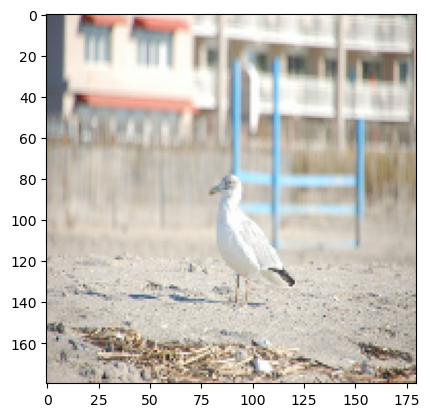

In [13]:
plt.imshow(train_images_np_rescaled[0])
plt.show()

In [14]:
data_col[train_labels_np[0]]

'060.Glaucous_winged_Gull'

In [15]:
val_iterator = val.as_numpy_iterator()
images_list = []
labels_list = []

for images, labels in val_iterator:
    images_list.append(images)
    labels_list.append(labels)

# Concatenate the lists into NumPy arrays
val_images_np = np.concatenate(images_list, axis=0)
val_labels_np = np.concatenate(labels_list, axis=0)

print("Images shape:", val_images_np.shape)
print("Labels shape:", val_labels_np.shape)

2024-03-28 21:08:30.275926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [11788]
	 [[{{node Placeholder/_4}}]]
2024-03-28 21:08:30.276890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11788]
	 [[{{node Placeholder/_0}}]]


Images shape: (2336, 180, 180, 3)
Labels shape: (2336,)


In [16]:
val_images_np_rescaled = val_images_np.astype(np.float32) / 255.0

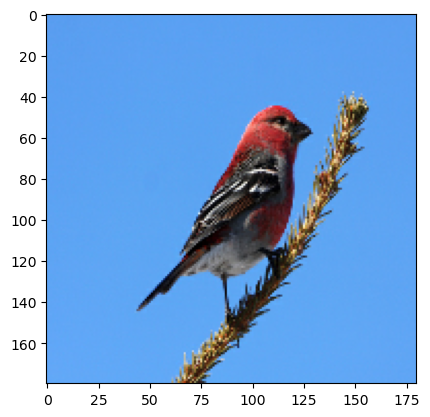

In [17]:
plt.imshow(val_images_np_rescaled[0])
plt.show()

In [18]:
data_col[val_labels_np[0]]

'056.Pine_Grosbeak'

In [19]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(images_np_rescaled, labels_np, random_state=0)

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
len(data_col)

200

In [22]:
# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

In [23]:
# plt.axis('off')
# plt.imshow(data_augmentation(X_train)[0].numpy().astype("uint8"))

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation using ImageDataGenerator
data_augmentation = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [25]:
# augmented_generator = data_augmentation.flow(
#     X_train,  # Input images
#     y_train,  # Corresponding labels
#     batch_size=32,  # Adjust batch size as needed
#     shuffle=True  # Shuffle data
# )

augmented_generator = data_augmentation.flow(
    train_images_np_rescaled,
    train_labels_np,
    batch_size=32,  # Adjust batch size as needed
    shuffle=True  # Shuffle data
)
if augmented_generator is None:
    print("Error: Augmented generator creation failed.")
else:
    print("Augmented generator created successfully.")

Augmented generator created successfully.


In [26]:
augmented_generator

In [27]:
augmented_images, augmented_labels = next(augmented_generator)
temp = augmented_images[0]
temp1 = augmented_labels[0]

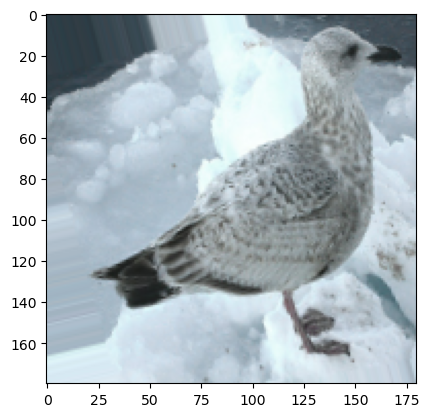

In [28]:
plt.imshow(temp)

In [29]:
data_col[temp1]

'065.Slaty_backed_Gull'

In [30]:
temp = train_images_np_rescaled[0:2]
temp1 = train_labels_np[0:2]

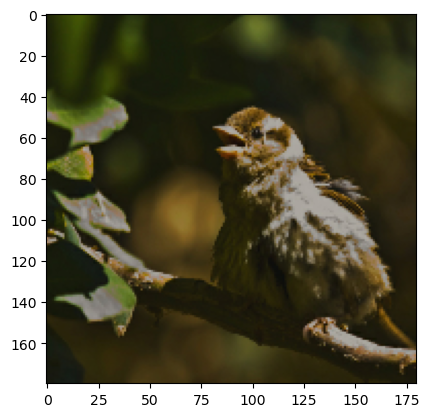

In [43]:
plt.imshow(temp[0])

In [58]:
temp2 = data_augmentation.flow(
    temp,
    temp1,
    batch_size=32,  # Adjust batch size as needed
    shuffle=True  # Shuffle data
)
if temp2 is None:
    print("Error: Augmented generator creation failed.")
else:
    print("Augmented generator created successfully.")

Augmented generator created successfully.


In [59]:
augmented_images, augmented_labels = next(temp2)
tem1 = augmented_images[0]
tem2 = augmented_labels[0]

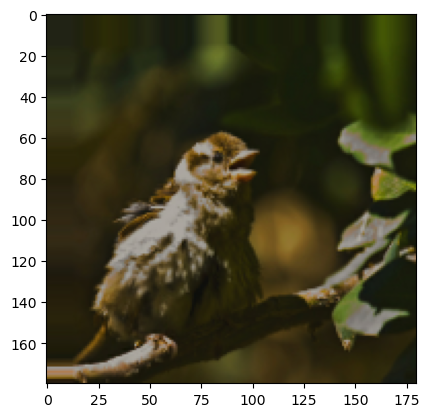

In [60]:
plt.imshow(tem1)

In [61]:
data_col[tem2]

'130.Tree_Sparrow'

In [30]:
augmented_images_list = []
augmented_labels_list = []

num_batches = len(augmented_generator)
for i in range(num_batches):
    batch_images, batch_labels = next(augmented_generator)
    augmented_images_list.append(batch_images)
    augmented_labels_list.append(batch_labels)

augmented_images_np = np.concatenate(augmented_images_list, axis=0)
augmented_labels_np = np.concatenate(augmented_labels_list, axis=0)

print("Augmented Images shape:", augmented_images_np.shape)
print("Augmented Labels shape:", augmented_labels_np.shape)

Augmented Images shape: (8256, 180, 180, 3)
Augmented Labels shape: (8256,)


In [31]:
augmented_images_np

array([[[[0.604684  , 0.70893234, 0.8829337 ],
         [0.604684  , 0.70893234, 0.8829337 ],
         [0.604684  , 0.70893234, 0.8829337 ],
         ...,
         [0.34489527, 0.41021988, 0.38765278],
         [0.19732073, 0.21515061, 0.13975781],
         [0.12252301, 0.16792445, 0.05125131]],

        [[0.604684  , 0.70893234, 0.8829337 ],
         [0.604684  , 0.70893234, 0.8829337 ],
         [0.604684  , 0.70893234, 0.8829337 ],
         ...,
         [0.35131973, 0.4212482 , 0.40292025],
         [0.20711906, 0.22454374, 0.14993702],
         [0.11549525, 0.15743999, 0.04560389]],

        [[0.604684  , 0.70893234, 0.8829337 ],
         [0.604684  , 0.70893234, 0.8829337 ],
         [0.604684  , 0.70893234, 0.8829337 ],
         ...,
         [0.35774422, 0.43227652, 0.41818774],
         [0.21691738, 0.23393686, 0.16011624],
         [0.1084675 , 0.14695553, 0.03995647]],

        ...,

        [[0.1907944 , 0.2886041 , 0.06963884],
         [0.1902316 , 0.28770828, 0.06923473]

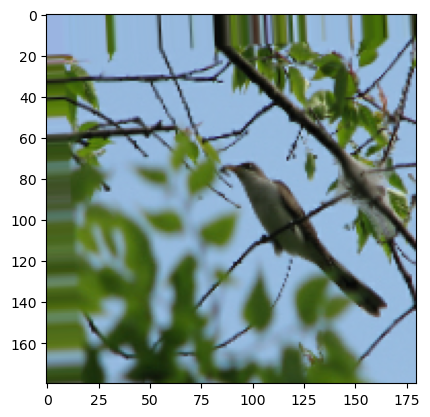

In [32]:
plt.imshow(augmented_images_np[0])

In [33]:
data_col[augmented_labels_np[0]]

'033.Yellow_billed_Cuckoo'

In [37]:
model = Sequential([
    # layers.Rescaling(1./255),
    # data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.50),
    layers.Dense(256,activation='relu'),
    # layers.Dropout(0.50),
    # layers.Dense(512,activation='relu'),
    layers.Dense(len(data_col),activation='softmax')
])

In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [93]:
# model_data = model.fit(augmented_images_np,augmented_labels_np,epochs = 25)
model_data = model.fit(augmented_images_np,augmented_labels_np,validation_data=(val_images_np_rescaled,val_labels_np),epochs = 25)
# model_data = model.fit(train,validation_data=val,epochs = 25)

Epoch 1/25
258/258 [==============================] - 94s 362ms/step - loss: 5.3009 - accuracy: 0.0044 - val_loss: 5.2996 - val_accuracy: 0.0026
Epoch 2/25
258/258 [==============================] - 90s 350ms/step - loss: 5.2985 - accuracy: 0.0055 - val_loss: 5.2923 - val_accuracy: 0.0030
Epoch 3/25
258/258 [==============================] - 91s 353ms/step - loss: 5.2205 - accuracy: 0.0099 - val_loss: 5.0956 - val_accuracy: 0.0146
Epoch 4/25
258/258 [==============================] - 84s 327ms/step - loss: 4.9974 - accuracy: 0.0165 - val_loss: 4.8541 - val_accuracy: 0.0244
Epoch 5/25
258/258 [==============================] - 84s 326ms/step - loss: 4.8138 - accuracy: 0.0233 - val_loss: 4.7360 - val_accuracy: 0.0308
Epoch 6/25
258/258 [==============================] - 85s 328ms/step - loss: 4.6544 - accuracy: 0.0308 - val_loss: 4.5992 - val_accuracy: 0.0428
Epoch 7/25
 43/258 [====>.........................] - ETA: 1:07 - loss: 4.5010 - accuracy: 0.0407

KeyboardInterrupt: 

In [63]:
model.evaluate(X_test,y_test)

93/93 [==============================] - 5s 52ms/step - loss: 13.6953 - accuracy: 0.0607


[13.695296287536621, 0.06073973700404167]

In [35]:
import tensorflow_hub as hub

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [36]:
model1 = Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(len(data_col))
])

In [37]:
model1.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [38]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 200)               256200    
                                                                 
Total params: 2,514,184
Trainable params: 256,200
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model_data1 = model1.fit(augmented_images_np,augmented_labels_np,validation_data=(val_images_np_rescaled,val_labels_np),epochs = 25)

Epoch 1/25
221/221 [==============================] - 68s 306ms/step - loss: 2.5987 - acc: 0.3988 - val_loss: 2.1029 - val_acc: 0.4864
Epoch 2/25
221/221 [==============================] - 72s 328ms/step - loss: 1.3556 - acc: 0.6797 - val_loss: 1.7233 - val_acc: 0.5702
Epoch 3/25
221/221 [==============================] - 75s 338ms/step - loss: 0.9124 - acc: 0.8088 - val_loss: 1.6149 - val_acc: 0.5719
Epoch 4/25
221/221 [==============================] - 76s 344ms/step - loss: 0.6617 - acc: 0.8791 - val_loss: 1.5324 - val_acc: 0.5946
Epoch 5/25
221/221 [==============================] - 79s 356ms/step - loss: 0.4953 - acc: 0.9242 - val_loss: 1.4922 - val_acc: 0.6077
Epoch 6/25
221/221 [==============================] - 80s 363ms/step - loss: 0.3841 - acc: 0.9498 - val_loss: 1.4774 - val_acc: 0.6062
Epoch 7/25
221/221 [==============================] - 80s 364ms/step - loss: 0.2992 - acc: 0.9707 - val_loss: 1.4791 - val_acc: 0.6125
Epoch 8/25
221/221 [==============================] - 8

In [34]:
test_iterator = test.as_numpy_iterator()
images_list = []
labels_list = []

for images, labels in test_iterator:
    images_list.append(images)
    labels_list.append(labels)

# Concatenate the lists into NumPy arrays
test_images_np = np.concatenate(images_list, axis=0)
test_labels_np = np.concatenate(labels_list, axis=0)

print("Images shape:", test_images_np.shape)
print("Labels shape:", test_labels_np.shape)

2024-03-28 21:10:29.113794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [11788]
	 [[{{node Placeholder/_4}}]]
2024-03-28 21:10:29.114068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [11788]
	 [[{{node Placeholder/_4}}]]


Images shape: (1152, 180, 180, 3)
Labels shape: (1152,)


In [35]:
test_images_np_rescaled = test_images_np.astype(np.float32) / 255.0

In [42]:
model1.evaluate(test_images_np,test_labels_np)

36/36 [==============================] - 7s 187ms/step - loss: 13.9810 - acc: 0.0026


[13.981014251708984, 0.0026041667442768812]

In [36]:
frequency = {}
for item in test_labels_np:
   if item in frequency:
      frequency[item] += 1
   else:
      frequency[item] = 1

print(frequency)
print(len(frequency))

{184: 7, 125: 3, 158: 5, 183: 10, 189: 7, 196: 8, 8: 4, 95: 4, 75: 10, 173: 9, 98: 6, 13: 10, 112: 3, 51: 5, 30: 6, 54: 6, 84: 7, 20: 5, 135: 11, 18: 5, 162: 7, 134: 9, 185: 10, 186: 6, 62: 8, 181: 4, 180: 13, 168: 7, 73: 7, 161: 7, 86: 10, 128: 11, 23: 4, 167: 6, 4: 4, 130: 6, 96: 6, 132: 1, 77: 5, 99: 10, 198: 7, 59: 3, 19: 10, 153: 5, 9: 5, 76: 9, 12: 9, 36: 7, 172: 5, 126: 7, 53: 11, 46: 5, 26: 5, 150: 4, 175: 5, 156: 4, 165: 4, 37: 7, 102: 8, 38: 8, 60: 9, 65: 3, 66: 5, 152: 6, 148: 7, 138: 9, 49: 4, 190: 8, 58: 3, 115: 5, 14: 5, 151: 10, 171: 3, 24: 10, 178: 7, 10: 6, 166: 6, 149: 6, 78: 7, 7: 5, 94: 8, 157: 3, 123: 7, 101: 6, 169: 6, 28: 7, 93: 6, 89: 6, 68: 6, 50: 4, 147: 9, 164: 10, 182: 5, 103: 4, 118: 3, 15: 6, 144: 8, 11: 13, 52: 4, 87: 7, 85: 8, 131: 5, 43: 3, 22: 5, 42: 8, 35: 5, 80: 4, 55: 9, 70: 5, 194: 7, 97: 9, 174: 6, 56: 6, 142: 5, 91: 5, 176: 4, 29: 6, 133: 7, 27: 12, 199: 5, 193: 6, 119: 7, 139: 6, 25: 7, 17: 6, 74: 4, 92: 8, 69: 4, 113: 3, 143: 7, 159: 3, 195: 6,

In [43]:
pretrained_model_xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling="max",
    classes=200,
    classifier_activation="softmax",
)
for layer in pretrained_model_xception.layers:
    layer.trainable=False

In [44]:
model_xception = Sequential([
    pretrained_model_xception,
    layers.Flatten(),
    # layers.Dense(256,activation='relu'),
    layers.Dense(200,activation='softmax'),
])

In [45]:
model_xception.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 200)               409800    
                                                                 
Total params: 21,271,280
Trainable params: 409,800
Non-trainable params: 20,861,480
_________________________________________________________________


In [46]:
model_xception.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [47]:
model_data_xception = model_xception.fit(augmented_images_np,augmented_labels_np,validation_data=(val_images_np_rescaled,val_labels_np),epochs = 15)

Epoch 1/15
258/258 [==============================] - 429s 2s/step - loss: 3.9198 - acc: 0.2335 - val_loss: 2.9102 - val_acc: 0.3373
Epoch 2/15
258/258 [==============================] - 427s 2s/step - loss: 1.9521 - acc: 0.5082 - val_loss: 2.8143 - val_acc: 0.3699
Epoch 3/15
258/258 [==============================] - 436s 2s/step - loss: 1.3631 - acc: 0.6286 - val_loss: 2.7946 - val_acc: 0.4212
Epoch 4/15
258/258 [==============================] - 430s 2s/step - loss: 0.9403 - acc: 0.7281 - val_loss: 2.5886 - val_acc: 0.4396
Epoch 5/15
258/258 [==============================] - 428s 2s/step - loss: 0.6503 - acc: 0.8165 - val_loss: 2.6670 - val_acc: 0.4170
Epoch 6/15
258/258 [==============================] - 428s 2s/step - loss: 0.5143 - acc: 0.8502 - val_loss: 2.7772 - val_acc: 0.4392
Epoch 7/15
258/258 [==============================] - 435s 2s/step - loss: 0.3821 - acc: 0.8974 - val_loss: 2.7800 - val_acc: 0.4405
Epoch 8/15
258/258 [==============================] - 431s 2s/step - 

In [50]:
model_xception.evaluate(test_images_np_rescaled,test_labels_np)

36/36 [==============================] - 47s 1s/step - loss: 3.4703 - acc: 0.4141


[3.470263957977295, 0.4140625]

In [44]:
pretrained_model_resnet = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling="max",
    classes=200,
    classifier_activation="softmax",
)
for layer in pretrained_model_resnet.layers:
    layer.trainable=False

In [45]:
model_resnet = Sequential([
    pretrained_model_resnet,
    layers.Flatten(),
    # layers.Dense(256,activation='relu'),
    layers.Dense(200,activation='softmax'),
])

In [46]:
model_resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 200)               409800    
                                                                 
Total params: 23,974,600
Trainable params: 409,800
Non-trainable params: 23,564,800
_________________________________________________________________


In [47]:
model_resnet.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [48]:
model_data_resnet = model_resnet.fit(
    augmented_images_np,
    augmented_labels_np,
    validation_data=(val_images_np_rescaled,val_labels_np),
    epochs = 10)

Epoch 1/10
258/258 [==============================] - 235s 909ms/step - loss: 15.5057 - acc: 0.1399 - val_loss: 11.7266 - val_acc: 0.2329
Epoch 2/10
258/258 [==============================] - 255s 988ms/step - loss: 6.9069 - acc: 0.4130 - val_loss: 10.9158 - val_acc: 0.2864
Epoch 3/10
258/258 [==============================] - 323s 1s/step - loss: 4.0477 - acc: 0.5734 - val_loss: 11.4380 - val_acc: 0.2962
Epoch 4/10
258/258 [==============================] - 390s 2s/step - loss: 2.7220 - acc: 0.6688 - val_loss: 11.2567 - val_acc: 0.3193
Epoch 5/10
258/258 [==============================] - 385s 1s/step - loss: 1.8892 - acc: 0.7571 - val_loss: 10.6728 - val_acc: 0.3305
Epoch 6/10
258/258 [==============================] - 378s 1s/step - loss: 1.3109 - acc: 0.8161 - val_loss: 11.3595 - val_acc: 0.3523
Epoch 7/10
258/258 [==============================] - 359s 1s/step - loss: 1.1237 - acc: 0.8442 - val_loss: 12.8467 - val_acc: 0.3433
Epoch 8/10
 91/258 [=========>....................] - E

KeyboardInterrupt: 

In [49]:
model_resnet.evaluate(test_images_np_rescaled,test_labels_np)

36/36 [==============================] - 36s 993ms/step - loss: 11.2999 - acc: 0.3542


[11.299878120422363, 0.3541666567325592]

In [50]:
pretrained_model_mobilenet = tf.keras.applications.MobileNet(
    input_shape=(180,180,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    pooling="max",
    classes=200,
    classifier_activation="softmax",
)
for layer in pretrained_model_mobilenet.layers:
    layer.trainable=False

17225924/17225924 [==============================] - 3s 0us/step


In [51]:
model_mobilenet = Sequential([
    pretrained_model_mobilenet,
    layers.Flatten(),
    # layers.Dense(256,activation='relu'),
    layers.Dense(200,activation='softmax'),
])

In [52]:
model_resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 200)               409800    
                                                                 
Total params: 23,974,600
Trainable params: 409,800
Non-trainable params: 23,564,800
_________________________________________________________________


In [53]:
model_mobilenet.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [54]:
model_data_mobilenet = model_mobilenet.fit(
    augmented_images_np,
    augmented_labels_np,
    validation_data=(val_images_np_rescaled,val_labels_np),
    epochs = 10)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


258/258 [==============================] - 46s 176ms/step - loss: 8.7256 - acc: 0.0654 - val_loss: 6.0351 - val_acc: 0.1648
Epoch 2/10
258/258 [==============================] - 49s 191ms/step - loss: 4.3533 - acc: 0.2932 - val_loss: 5.1606 - val_acc: 0.2509
Epoch 3/10
258/258 [==============================] - 56s 219ms/step - loss: 2.7067 - acc: 0.4680 - val_loss: 4.8412 - val_acc: 0.2753
Epoch 4/10
258/258 [==============================] - 69s 266ms/step - loss: 1.7280 - acc: 0.6151 - val_loss: 4.5670 - val_acc: 0.3031
Epoch 5/10
258/258 [==============================] - 73s 283ms/step - loss: 1.1510 - acc: 0.7243 - val_loss: 4.2109 - val_acc: 0.3382
Epoch 6/10
258/258 [==============================] - 74s 287ms/step - loss: 0.8053 - acc: 0.7926 - val_loss: 4.3935 - val_acc: 0.3386
Epoch 7/10
258/258 [==============================] - 77s 298ms/step - loss: 0.5294 - acc: 0.8596 - val_loss: 4.2094 - val_acc: 0.3532
Epoch 8/10
258/258 [==============================] - 79s 305ms/st

In [55]:
model_mobilenet.evaluate(test_images_np_rescaled,test_labels_np)

36/36 [==============================] - 5s 134ms/step - loss: 4.4760 - acc: 0.3568


[4.475950241088867, 0.3567708432674408]

In [42]:
from tensorflow.keras import models, optimizers

In [55]:
pretrained_model_efficientnetb0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    # pooling="max",
    classes=200,
    classifier_activation="softmax",
    # **kwargs
)
for layer in pretrained_model_efficientnetb0.layers:
    layer.trainable=False

x = pretrained_model_efficientnetb0.output
x = layers.GlobalAveragePooling2D()(x)  # Apply Global Average Pooling
x = layers.Dense(2048, activation='swish')(x)  # Add a dense layer with Swish activation
x = layers.Dropout(0.3)(x)  # Apply Dropout for regularization
outputs = layers.Dense(200, activation='softmax')(x)  # Final dense layer for classification

pretrained_model_efficientnetb0 = models.Model(inputs=pretrained_model_efficientnetb0.input, outputs=outputs)


In [56]:
# model_efficientnetb0 = Sequential([
#     pretrained_model_efficientnetb0,
#     layers.Flatten(),
#     # layers.Dense(256,activation='relu'),
#     layers.Dense(200,activation='softmax'),
# ])

In [57]:
pretrained_model_efficientnetb0.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_16 (Rescaling)       (None, 180, 180, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_8 (Normalization  (None, 180, 180, 3)  7          ['rescaling_16[0][0]']           
 )                                                                                                
                                                                                            

In [53]:
model_efficientnetb0.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [54]:
model_data_efficientnetb0 = model_efficientnetb0.fit(
    augmented_images_np,
    augmented_labels_np,
    validation_data=(val_images_np_rescaled,val_labels_np),
    epochs = 10)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


258/258 [==============================] - 159s 605ms/step - loss: 5.5796 - acc: 0.0048 - val_loss: 5.6319 - val_acc: 0.0043
Epoch 2/10
 54/258 [=====>........................] - ETA: 1:31 - loss: 5.5716 - acc: 0.0041

KeyboardInterrupt: 

In [48]:
model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
for layer in model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(model.output)
x = layers.Dense(2048, activation='swish')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(200, activation='softmax')(x)

model = models.Model(inputs=model.input, outputs=outputs)

model.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# history = model.fit(
#     augmented_images_np,
#     augmented_labels_np,
#     validation_data=(val_images_np_rescaled,val_labels_np),
#     epochs = 10)

history = model.fit(augmented_generator, epochs=10, validation_data=val)

# test_loss, test_acc = model.evaluate(test_data)
# print(f'Test Accuracy: {test_acc * 100}%')

Epoch 1/10


2024-03-28 21:41:21.485082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


258/258 [==============================] - 113s 431ms/step - loss: 5.5878 - accuracy: 0.0053 - val_loss: 6.1843 - val_accuracy: 0.0064
Epoch 2/10
239/258 [==========================>...] - ETA: 7s - loss: 5.5030 - accuracy: 0.0048

KeyboardInterrupt: 

In [47]:
model.evaluate(test)

36/36 [==============================] - 15s 277ms/step - loss: 1.7008 - accuracy: 0.6398


[1.7008471488952637, 0.6397569179534912]

In [ ]:
pretrained_model_efficientnetb0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    # pooling="max",
    classes=200,
    classifier_activation="softmax",
    # **kwargs
)
for layer in pretrained_model_efficientnetb0.layers:
    layer.trainable=False


model_efficientnetb0 = Sequential([
    pretrained_model_efficientnetb0,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2048, activation='swish'),
    layers.Dropout(0.3),
    layers.Dense(200, activation='softmax')
])

model_efficientnetb0.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])